# Table of Contents
 <p><div class="lev1 toc-item"><a href="#RNN" data-toc-modified-id="RNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RNN</a></div><div class="lev2 toc-item"><a href="#RNN-with-IMDB-Data-Revisit" data-toc-modified-id="RNN-with-IMDB-Data-Revisit-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>RNN with IMDB Data Revisit</a></div><div class="lev3 toc-item"><a href="#Load-Data" data-toc-modified-id="Load-Data-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Load Data</a></div><div class="lev3 toc-item"><a href="#Create-Model" data-toc-modified-id="Create-Model-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Create Model</a></div><div class="lev3 toc-item"><a href="#Fit-the-Model" data-toc-modified-id="Fit-the-Model-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Fit the Model</a></div><div class="lev3 toc-item"><a href="#Plot-the-Results" data-toc-modified-id="Plot-the-Results-114"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Plot the Results</a></div><div class="lev2 toc-item"><a href="#RNN-with-Weather-Forcast" data-toc-modified-id="RNN-with-Weather-Forcast-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>RNN with Weather Forcast</a></div><div class="lev3 toc-item"><a href="#Prepare-the-Data" data-toc-modified-id="Prepare-the-Data-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Prepare the Data</a></div><div class="lev3 toc-item"><a href="#Prepare-Training,-Validation-and-Test-Data" data-toc-modified-id="Prepare-Training,-Validation-and-Test-Data-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Prepare Training, Validation and Test Data</a></div><div class="lev4 toc-item"><a href="#Common-Sense" data-toc-modified-id="Common-Sense-1221"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Common Sense</a></div>

### 

# RNN

## RNN with IMDB Data Revisit

### Load Data

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

- Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.
- The argument num_words=10000 means you’ll only keep the top 10,000 most fre- quently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.
- y_train is either "positive" or "negative", alternatilvey, 1 or 0, respectively.

In [38]:
max_features = 10000 #Number of words to consider as features
maxlen = 500 #Cuts off texts after this many words (among the max_features most common words)

batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(input_train.shape) 
print(y_train.shape)

Loading data...
(25000,)
(25000,)


- Input_train returns (25000, ), however, it is a nested list, the reason why it's one element tuple shape, is because the inner lists have different length
which is the review sentence converted to integers
- y_train.shape is an "one-elemnt-tuple", is because it's a list that includes element either 0 or 1

In [39]:
print('Pad sequences (samples x time)')

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
# Example, 
#tf.keras.preprocessing.sequence.pad_sequences(
#    sequences, maxlen=None, dtype='int32', padding='pre',
#    truncating='pre', value=0.0
#)
# sequences is iterable, each sequence inside the sequences will be padded with some values
# value --> set the padding value
# padding/truncating --> meaning, either padding pre or post
# return --> Numpy array with shape (len(sequences), maxlen)

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


As we can see the input_train and input_test --> X's shape is changed from (25000,) to (25000, 500), since the paddings are added.

### Create Model

In [40]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

作为 Sequential 模型的第一层，需要指定输入维度。可以为 input_shape=(16,) 或者 input_dim=16，这两者是等价的。

model = Sequential()

model.add(Dense(32, input_shape=(16,)))

现在模型就会以尺寸为 (*, 16) 的数组作为输入，

其输出数组的尺寸为 (*, 32)


在第一层之后，就不再需要指定输入的尺寸了：

model.add(Dense(32))


In [57]:
model = Sequential() 
model.add(Embedding(max_features, 32))  # max_features are the most frequent 10,000 words
model.add(SimpleRNN(32)) # return_sequences=False --> is default, return only RNN(T), not the whole sequence
model.add(Dense(1, activation='sigmoid')) # fully connected / dense layer, doesn't need to specify the input dimension, unless it's the first layer.
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 

In [58]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### Fit the Model

In [42]:
history = model.fit(input_train, y_train,
                    epochs=10, batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 14s 85ms/step - loss: 0.6381 - acc: 0.6205 - val_loss: 0.4858 - val_acc: 0.7924
Epoch 2/10
157/157 [==============================] - 14s 87ms/step - loss: 0.4019 - acc: 0.8298 - val_loss: 0.3797 - val_acc: 0.8404
Epoch 3/10
157/157 [==============================] - 14s 88ms/step - loss: 0.3001 - acc: 0.8781 - val_loss: 0.4692 - val_acc: 0.7764
Epoch 4/10
157/157 [==============================] - 14s 88ms/step - loss: 0.2391 - acc: 0.9093 - val_loss: 0.3300 - val_acc: 0.8676
Epoch 5/10
157/157 [==============================] - 14s 88ms/step - loss: 0.1904 - acc: 0.9287 - val_loss: 0.4273 - val_acc: 0.8300
Epoch 6/10
157/157 [==============================] - 14s 88ms/step - loss: 0.1518 - acc: 0.9470 - val_loss: 0.4923 - val_acc: 0.8000
Epoch 7/10
157/157 [==============================] - 14s 86ms/step - loss: 0.1087 - acc: 0.9620 - val_loss: 0.5331 - val_acc: 0.7918
Epoch 8/10
157/157 [==============================] - 13s 84ms

### Plot the Results

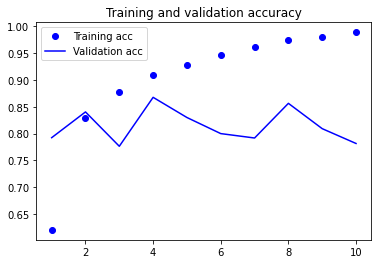

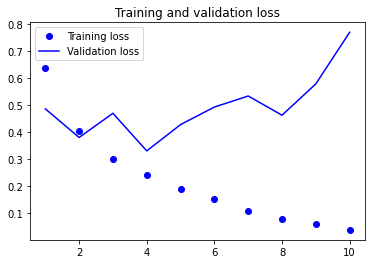

In [43]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [53]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(1, 32))
model.add(SimpleRNN(2))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 32)          32        
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 2)                 70        
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


In [54]:
32 * 32 * 2 + 32

2080

## RNN with Weather Forcast

In [1]:
import pandas as pd
import os

In [2]:
data_dir = "/Users/junsu/Dropbox/deep_learning/tf1/tf1_lib/data_inputs/jena_climate"
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
df = pd.read_csv(fname)

In [3]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


<AxesSubplot:>

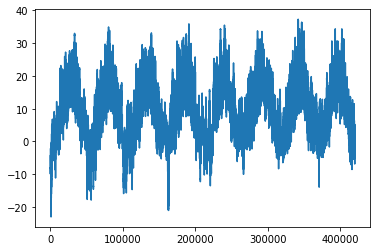

In [4]:
df['T (degC)'].plot()

<AxesSubplot:>

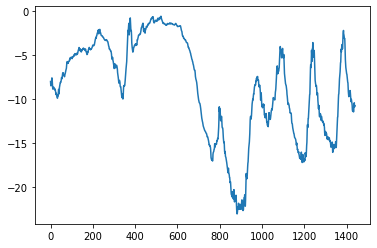

In [5]:
df['T (degC)'].head(1440).plot()

### Prepare the Data

Note, we don't follow Keras's book to create float_data.

In [6]:
# f = open(fname)
# data = f.read()
# f.close()
# lines = data.split('\n')
# header = lines[0].split(',')
# lines = lines[1:]
# print(header)
# print(len(lines))


# import numpy as np
# float_data = np.zeros((len(lines), len(header) - 1))
# for i, line in enumerate(lines):
#     values = [float(x) for x in line.split(',')[1:]]
#     float_data[i, :] = values
# print(np.array_equal(df.iloc[:, 1:].values , float_data)) # --> this should be true

In [7]:
float_data = df.iloc[:, 1:].values
sample_num = int(2e5)
mean = float_data[:sample_num].mean(axis=0)
std = float_data[:sample_num].std(axis=0)
float_data_new = float_data - mean
float_data_new /= std

In [10]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets


### Prepare Training, Validation and Test Data

In [11]:

lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)


test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback)

test_steps = (len(float_data) - 300001 - lookback)

#### Common Sense

In this case, the temperature timeseries can safely be assumed to be continuous (the temperatures tomorrow are likely to be close to the temperatures today) as well as periodical with a daily period. Thus a common-sense approach is to always predict that the temperature 24 hours from now will be equal to the temperature right now.

In [17]:
import numpy as np

In [18]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        if step % 1000 ==0:
            print(step)
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

In [19]:
evaluate_naive_method()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
2.5645638478601653


In [21]:
celsius_mae = 0.29 * std[1]

In [22]:
celsius_mae

2.567224733839344